In [2]:
"""
This notebook aims to perform EDA with Materials Project API(https://next-gen.materialsproject.org/api).
Specifically, analyze frequency dependent dielectric at /materials/dielectric.
"""


'\n\nThis notebook aims to perform EDA with Materials Project API(https://next-gen.materialsproject.org/api).\nSpecifically, analyze frequency dependent dielectric at /materials/dielectric.\n\n'

In [8]:
from mp_api.client import MPRester
from emmet.core.summary import HasProps
import matplotlib.pyplot as plt
import collections
import numpy as np
import pandas as pd
from typing import List, Dict
import json

In [2]:
MY_API_KEY = "HPnhjtiVgcMGwniGlFFtr877nVA7skf6"

In [3]:
with MPRester(MY_API_KEY) as mpr:
    docs = mpr.summary.search(
        has_props = [HasProps.absorption], fields=["material_id"]
    )
    mpids = [doc.material_id for doc in docs]
print(len(mpids))
print(mpids[:10])

/var/folders/8n/zkrgk3d10dq6kb0xpmh84kr80000gn/T/ipykernel_86130/405664063.py:2: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  docs = mpr.summary.search(


[<HasProps.absorption: 'absorption'>]


Retrieving SummaryDoc documents: 100%|███████████████████████| 940/940 [00:00<00:00, 7700480.00it/s]

940
[MPID(mp-546266), MPID(mp-9583), MPID(mp-22988), MPID(mp-861502), MPID(mp-1025029), MPID(mp-22867), MPID(mp-1217120), MPID(mp-3924), MPID(mp-22935), MPID(mp-8181)]


Take a glipse on mp-546266

In [92]:
# take a glipse on mp-546266
with MPRester(MY_API_KEY) as mpr:
    docs = mpr.materials.absorption.search(material_ids=["mp-546266"])

mp546266 = docs[0]

Retrieving AbsorptionDoc documents: 100%|██████████████| 1/1 [00:00<00:00, 13662.23it/s]


In [93]:
mp546266 # energies, average_imaginary_dielectric, average_real_dielectric

MPDataDoc<AbsorptionDoc>(
builder_meta=EmmetMeta(emmet_version='0.63.1', pymatgen_version='2023.7.17', pull_request=990, database_version='2023.11.1', build_date=datetime.datetime(2023, 8, 9, 6, 11, 13, 246000), license=None),
nsites=8,
elements=[Element Bi, Element Dy, Element I, Element O],
nelements=4,
composition=Composition('Dy1 Bi2 I1 O4'),
composition_reduced=Composition('Dy1 Bi2 I1 O4'),
formula_pretty='DyBi2IO4',
formula_anonymous='ABC2D4',
chemsys='Bi-Dy-I-O',
volume=150.7278346148102,
density=8.497953834691662,
density_atomic=18.840979326851276,
symmetry=SymmetryData(crystal_system=<CrystalSystem.tet: 'Tetragonal'>, symbol='P4/mmm', number=123, point_group='4/mmm', symprec=0.1, version='1.16.5'),
property_name='Optical absorption spectrum',
material_id=MPID(mp-546266),
deprecated=False,
deprecation_reasons=None,
last_updated=datetime.datetime(2023, 3, 11, 18, 39, 51, 454000),
origins=[PropertyOrigin(name='absorption', task_id=MPID(mp-2768572), last_updated=datetime.datetime(

In [112]:
mp546266.__fields__.keys()

/var/folders/8n/zkrgk3d10dq6kb0xpmh84kr80000gn/T/ipykernel_10566/941986552.py:1: PydanticDeprecatedSince20: The `__fields__` attribute is deprecated, use `model_fields` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.5/migration/
  mp546266.__fields__.keys()


dict_keys(['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'task_id', 'energies', 'energy_max', 'absorption_coefficient', 'average_imaginary_dielectric', 'average_real_dielectric', 'bandgap', 'nkpoints', 'fields_not_requested'])

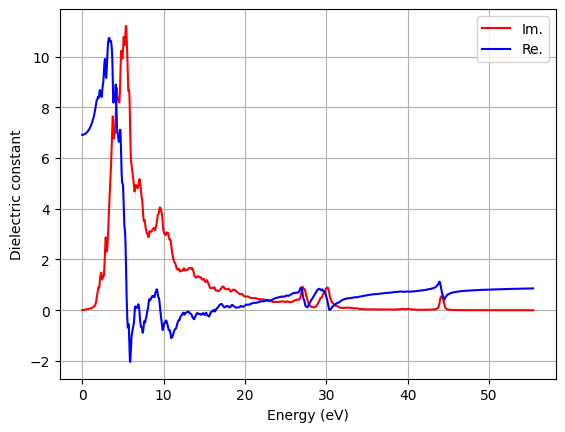

In [116]:
energy_list = mp546266.energies
im_dielectric = mp546266.average_imaginary_dielectric
re_dielectric = mp546266.average_real_dielectric
plt.plot(energy_list, im_dielectric, label='Im.', color='red')
plt.plot(energy_list, re_dielectric, label='Re.', color='blue')
plt.legend()
plt.xlabel('Energy (eV)')
plt.ylabel('Dielectric constant')
plt.grid()

Get the element distribution of all materials having absorption data.

In [5]:
# query from the API
with MPRester(MY_API_KEY) as mpr:
    all_absorption_materials = mpr.materials.summary.search(material_ids=mpids, fields=['elements'])

all_absorption_materials

Retrieving SummaryDoc documents: 100%|███████████████████████| 940/940 [00:00<00:00, 9906145.13it/s]


[MPDataDoc<SummaryDoc>(
 elements=[Element Ac, Element O],
 fields_not_requested=['builder_meta', 'nsites', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_anis

In [102]:
len(all_absorption_materials)

940

In [6]:
element_count_dict = collections.defaultdict(int)
for material in all_absorption_materials:
    for element in material.elements:
        # element_count_dict[element.name] += 1
        element_count_dict[element] += 1

In [154]:
def get_periodic_table() -> pd.DataFrame:
    """
    RETURNS:
        periodic_table_df(pd.DataFrame)
    """
    periodic_table_df = pd.DataFrame(columns=range(18), index=range(9))
    from pymatgen.core.periodic_table import ElementBase
    La_list = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
    Ac_list = ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
    La_Ac_offset = 3
    for z in range(1, 119):
        e = ElementBase.from_Z(z)
        tem_group = e.group
        tem_row = e.row
        if (tem_group == 3 and tem_row == 6):
            # La 
            tem_row = 8
            tem_group = La_Ac_offset + La_list.index(e.name)
        elif (tem_group == 3 and tem_row == 7):
            # Ac
            tem_row = 9
            tem_group = La_Ac_offset + Ac_list.index(e.name)

        periodic_table_df.loc[tem_row-1, tem_group-1] = e.name
    return(periodic_table_df)
    

In [156]:
periodic_table_df = get_periodic_table()
periodic_table_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,He
1,Li,Be,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,N,O,F,Ne
2,Na,Mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al,Si,P,S,Cl,Ar
3,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr
4,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe
5,Cs,Ba,NaN,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
6,Fr,Ra,NaN,Rf,Db,Sg,Bh,Hs,Mt,Ds,Rg,Cn,Nh,Fl,Mc,Lv,Ts,Og
7,NaN,NaN,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,NaN
8,NaN,NaN,Ac,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr,NaN


In [260]:
def plot_periodic_table_heat_map(value_dic: Dict[Element, float], periodic_table_df):
    """
    PARAMS:
        value_dic(dict): a dict with key type pymatgen.core.periodic_table.Element, with value is int(float)
        periodic_table_df: the DataFrame produced by the function get_periodic_table
    """
    La_list = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
    Ac_list = ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
    La_Ac_offset = 3
    
    periodic_table_count_np = np.zeros(shape=(9, 18))
    for e in element_count_dict:     
        tem_group = e.group
        tem_row = e.row
        if (tem_group == 3 and tem_row == 6):
            # La 
            tem_row = 8
            tem_group = La_Ac_offset + La_list.index(e.name)
        elif (tem_group == 3 and tem_row == 7):
            # Ac
            tem_row = 9
            tem_group = La_Ac_offset + Ac_list.index(e.name)
        periodic_table_count_np[tem_row-1][tem_group-1] = element_count_dict[e]
        
    # plot
    fig, ax = plt.subplots(figsize=(8, 10))

    im = ax.imshow(periodic_table_count_np, cmap='hot')
    # annotation
    for i in range(9):
        for j in range(18):
            if not pd.isna(periodic_table_df.loc[i, j]):
                ax.annotate(str(periodic_table_df.loc[i, j]), xy=(j, i),
                             ha='center', va='center', color='grey')
    plt.axis('off')
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax)
    return()

()

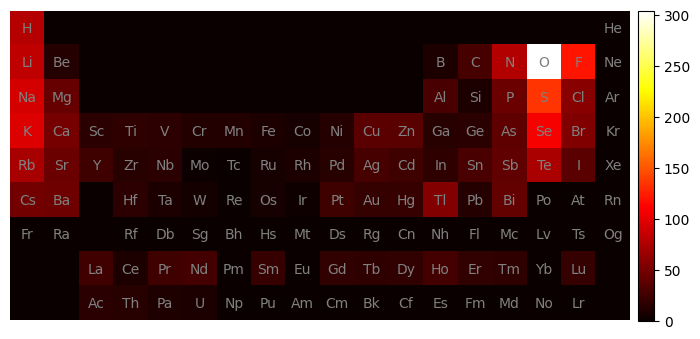

In [261]:
plot_periodic_table_heat_map(element_count_dict, periodic_table_df)

In [264]:
# how many material have Au?

gold_alloy = []
for material in all_absorption_materials:
    for element in material.elements:
        if element.name == 'Au':
            gold_alloy.append(material)
len(gold_alloy)

20

In [265]:
gold_alloy

[MPDataDoc<SummaryDoc>(
 elements=[Element Au, Element Cs],
 fields_not_requested=['builder_meta', 'nsites', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total_magnetization_normalized_formula_units', 'num_magnetic_sites', 'num_unique_magnetic_sites', 'types_of_magnetic_species', 'bulk_modulus', 'shear_modulus', 'universal_ani

In [11]:
# store required file for periodic table heatmap toolkit

In [10]:
test_dist_element = dict()
for element in element_count_dict:
    test_dist_element[element.name] = element_count_dict[element]
    
with open('test_dist.json', 'w') as fp:
    json.dump(test_dist_element, fp)

In [13]:
def get_periodic_table() -> pd.DataFrame:
    """
    RETURNS:
        periodic_table_df(pd.DataFrame)
    """
    periodic_table_df = pd.DataFrame(columns=range(18), index=range(9))
    from pymatgen.core.periodic_table import ElementBase
    La_list = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
    Ac_list = ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
    La_Ac_offset = 3
    for z in range(1, 119):
        e = ElementBase.from_Z(z)
        tem_group = e.group
        tem_row = e.row
        if (tem_group == 3 and tem_row == 6):
            # La 
            tem_row = 8
            tem_group = La_Ac_offset + La_list.index(e.name)
        elif (tem_group == 3 and tem_row == 7):
            # Ac
            tem_row = 9
            tem_group = La_Ac_offset + Ac_list.index(e.name)

        periodic_table_df.loc[tem_row-1, tem_group-1] = e.name
    periodic_table_df.to_csv('periodic_table_df.csv')
    return(periodic_table_df)
get_periodic_table()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,He
1,Li,Be,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,N,O,F,Ne
2,Na,Mg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Al,Si,P,S,Cl,Ar
3,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Se,Br,Kr
4,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Te,I,Xe
5,Cs,Ba,NaN,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Po,At,Rn
6,Fr,Ra,NaN,Rf,Db,Sg,Bh,Hs,Mt,Ds,Rg,Cn,Nh,Fl,Mc,Lv,Ts,Og
7,NaN,NaN,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,NaN
8,NaN,NaN,Ac,Th,Pa,U,Np,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr,NaN


In [16]:
def get_periodic_table_position_index() -> dict:
    """
    RETURNS:
        periodic_table_dict(dict of str: [str, int, int]): keys: Z number(int). values: [element name, row_index, group_index]
    """
    # periodic_table_df = pd.DataFrame(columns=range(18), index=range(9))
    periodic_table_dict = dict()
    from pymatgen.core.periodic_table import ElementBase
    La_list = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
    Ac_list = ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
    La_Ac_offset = 3
    for z in range(1, 119):
        e = ElementBase.from_Z(z)
        tem_group = e.group
        tem_row = e.row
        if (tem_group == 3 and tem_row == 6):
            # La 
            tem_row = 8
            tem_group = La_Ac_offset + La_list.index(e.name)
        elif (tem_group == 3 and tem_row == 7):
            # Ac
            tem_row = 9
            tem_group = La_Ac_offset + Ac_list.index(e.name)
        periodic_table_dict[z] = [e.name, tem_row, tem_group]
        # periodic_table_df.loc[tem_row-1, tem_group-1] = e.name
    with open('periodic_table_dict.json', 'w') as fp:
        json.dump(periodic_table_dict, fp)
    return(periodic_table_dict)
get_periodic_table_position_index()

{1: ['H', 1, 1],
 2: ['He', 1, 18],
 3: ['Li', 2, 1],
 4: ['Be', 2, 2],
 5: ['B', 2, 13],
 6: ['C', 2, 14],
 7: ['N', 2, 15],
 8: ['O', 2, 16],
 9: ['F', 2, 17],
 10: ['Ne', 2, 18],
 11: ['Na', 3, 1],
 12: ['Mg', 3, 2],
 13: ['Al', 3, 13],
 14: ['Si', 3, 14],
 15: ['P', 3, 15],
 16: ['S', 3, 16],
 17: ['Cl', 3, 17],
 18: ['Ar', 3, 18],
 19: ['K', 4, 1],
 20: ['Ca', 4, 2],
 21: ['Sc', 4, 3],
 22: ['Ti', 4, 4],
 23: ['V', 4, 5],
 24: ['Cr', 4, 6],
 25: ['Mn', 4, 7],
 26: ['Fe', 4, 8],
 27: ['Co', 4, 9],
 28: ['Ni', 4, 10],
 29: ['Cu', 4, 11],
 30: ['Zn', 4, 12],
 31: ['Ga', 4, 13],
 32: ['Ge', 4, 14],
 33: ['As', 4, 15],
 34: ['Se', 4, 16],
 35: ['Br', 4, 17],
 36: ['Kr', 4, 18],
 37: ['Rb', 5, 1],
 38: ['Sr', 5, 2],
 39: ['Y', 5, 3],
 40: ['Zr', 5, 4],
 41: ['Nb', 5, 5],
 42: ['Mo', 5, 6],
 43: ['Tc', 5, 7],
 44: ['Ru', 5, 8],
 45: ['Rh', 5, 9],
 46: ['Pd', 5, 10],
 47: ['Ag', 5, 11],
 48: ['Cd', 5, 12],
 49: ['In', 5, 13],
 50: ['Sn', 5, 14],
 51: ['Sb', 5, 15],
 52: ['Te', 5, 16],
 53

In [ ]:
def plot_periodic_table_heat_map(value_dic: Dict[Element, float], periodic_table_df):
    """
    PARAMS:
        value_dic(dict): a dict with key type pymatgen.core.periodic_table.Element, with value is int(float)
        periodic_table_df: the DataFrame produced by the function get_periodic_table
    """
    La_list = ['La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
    Ac_list = ['Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']
    La_Ac_offset = 3
    
    periodic_table_count_np = np.zeros(shape=(9, 18))
    for e in element_count_dict:     
        tem_group = e.group
        tem_row = e.row
        if (tem_group == 3 and tem_row == 6):
            # La 
            tem_row = 8
            tem_group = La_Ac_offset + La_list.index(e.name)
        elif (tem_group == 3 and tem_row == 7):
            # Ac
            tem_row = 9
            tem_group = La_Ac_offset + Ac_list.index(e.name)
        periodic_table_count_np[tem_row-1][tem_group-1] = element_count_dict[e]
        
    # plot
    fig, ax = plt.subplots(figsize=(8, 10))

    im = ax.imshow(periodic_table_count_np, cmap='hot')
    # annotation
    for i in range(9):
        for j in range(18):
            if not pd.isna(periodic_table_df.loc[i, j]):
                ax.annotate(str(periodic_table_df.loc[i, j]), xy=(j, i),
                             ha='center', va='center', color='grey')
    plt.axis('off')
    cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax)
    return()